Root Mean Squared Error (RMSE): 1.6329
Mean Absolute Error (MAE): 0.6116
Total Training + Testing Time: 6.1343 seconds


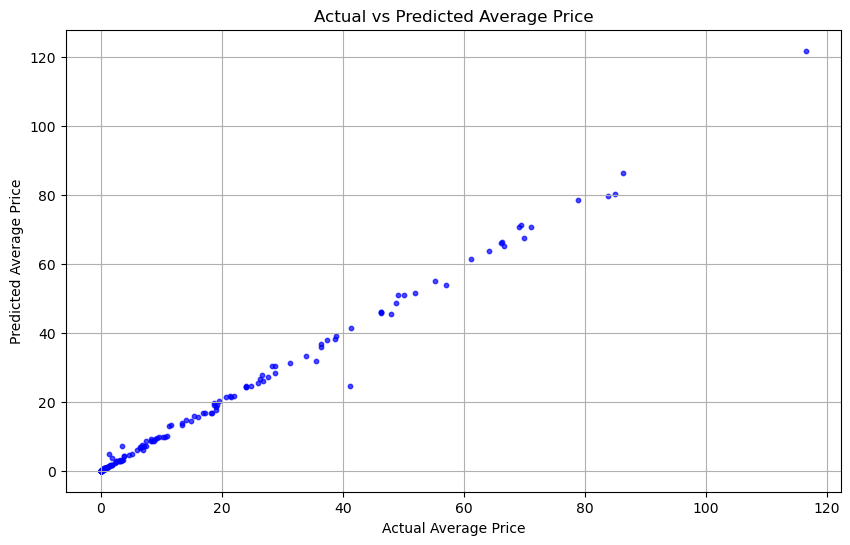

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('option_data.csv')

label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

df['Average Price'] = (df['Bid'] + df['Ask']) / 2

df['DataDate'] = pd.to_datetime(df[' DataDate'])
df['Expiration'] = pd.to_datetime(df['Expiration'])
df['TimeToMaturity'] = (df['Expiration'] - df['DataDate']).dt.days / 252

columns_to_drop = ['Expiration', 'DataDate', ' DataDate', 'AKA', 'OptionSymbol', 'Ask', 'Bid']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

X = df.drop('Average Price', axis=1)  
y = df['Average Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

end_time = time.time()
total_time = end_time - start_time

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Total Training + Testing Time: {total_time:.4f} seconds")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, s=10)
plt.plot([0, max_val], [0, max_val], color='green', linewidth=1)
plt.title('Actual vs Predicted Average Price')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.grid(True)
plt.show()


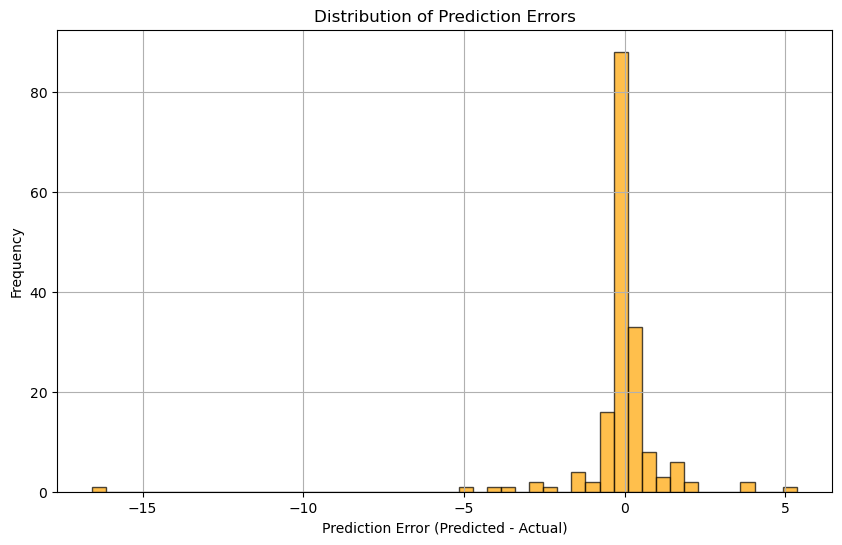

In [3]:
# Calculate prediction errors
errors = y_pred - y_test

# Plot error distribution
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


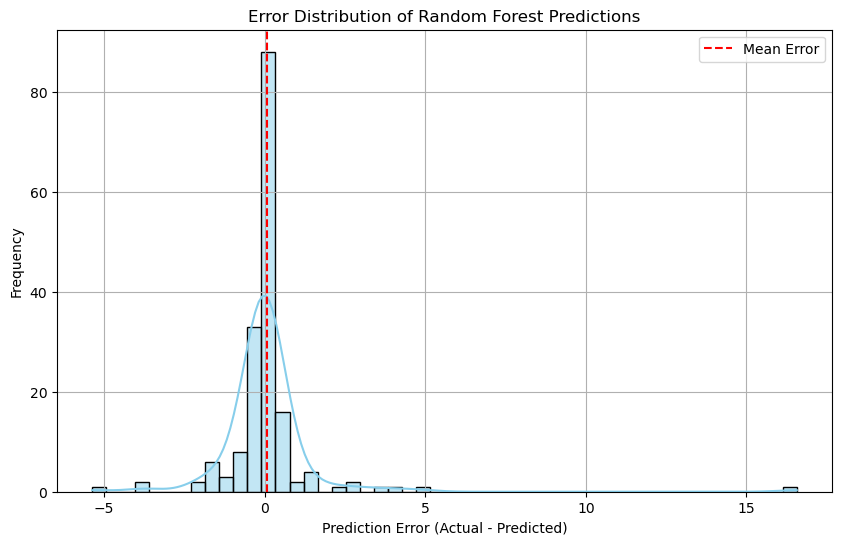

In [7]:
import seaborn as sns

# Calculate prediction errors
errors = y_test - y_pred

# Plot the error distribution
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=50, color='skyblue', edgecolor='black')
plt.axvline(errors.mean(), color='red', linestyle='--', label='Mean Error')
plt.title('Error Distribution of Random Forest Predictions')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('plot1.png')
plt.show()


Root Mean Squared Error (RMSE): 1.8853
Mean Absolute Error (MAE): 0.8033
Testing Time: 0.0000 seconds


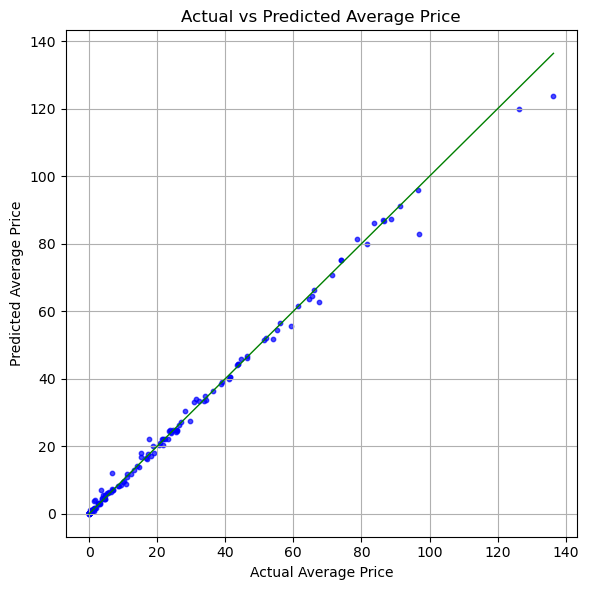

In [13]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('option_data.csv')

label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

df['Average Price'] = (df['Bid'] + df['Ask']) / 2

df['DataDate'] = pd.to_datetime(df[' DataDate'])
df['Expiration'] = pd.to_datetime(df['Expiration'])
df['TimeToMaturity'] = (df['Expiration'] - df['DataDate']).dt.days / 252

columns_to_drop = ['Expiration', 'DataDate', ' DataDate', 'AKA', 'OptionSymbol', 'Ask', 'Bid']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

X = df.drop('Average Price', axis=1)  
y = df['Average Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

start_time = time.time()
y_pred = rf_model.predict(X_test_scaled)
end_time = time.time()
testing_time = end_time - start_time

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Testing Time: {testing_time:.4f} seconds")

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, s=10)
max_val = max(max(y_test), max(y_pred))
plt.plot([0, max_val], [0, max_val], color='green', linewidth=1)
plt.title('Actual vs Predicted Average Price')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.grid(True)
plt.tight_layout()
plt.savefig("plot5.png")
plt.show()


Root Mean Squared Error (RMSE): 1.8853
Mean Absolute Error (MAE): 0.8033
Training Time: 5.0500 seconds
Testing Time: 0.0157 seconds


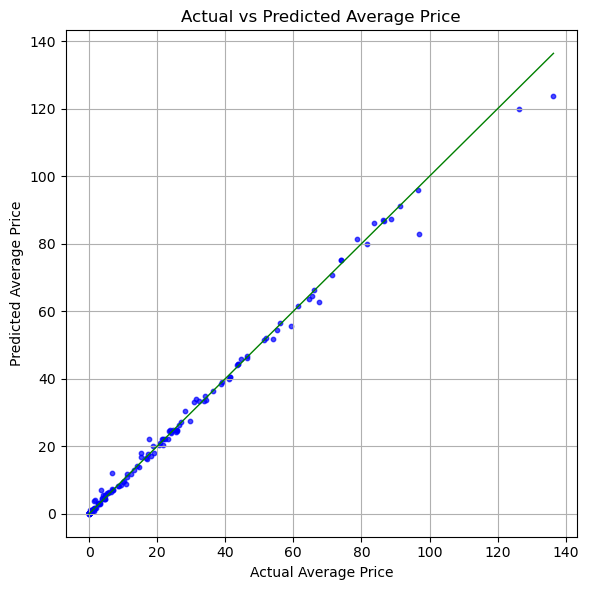

In [16]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('option_data.csv')

label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])


df['Average Price'] = (df['Bid'] + df['Ask']) / 2

df['DataDate'] = pd.to_datetime(df[' DataDate'])
df['Expiration'] = pd.to_datetime(df['Expiration'])
df['TimeToMaturity'] = (df['Expiration'] - df['DataDate']).dt.days / 252

columns_to_drop = ['Expiration', 'DataDate', ' DataDate', 'AKA', 'OptionSymbol', 'Ask', 'Bid']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

X = df.drop('Average Price', axis=1)
y = df['Average Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_train = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
end_train = time.time()

start_test = time.time()
y_pred = rf_model.predict(X_test_scaled)
end_test = time.time()

training_time = end_train - start_train
testing_time = end_test - start_test

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, s=10)
max_val = max(max(y_test), max(y_pred))
plt.plot([0, max_val], [0, max_val], color='green', linewidth=1)
plt.title('Actual vs Predicted Average Price')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.grid(True)
plt.tight_layout()
plt.savefig("plot5.png")
plt.show()


Root Mean Squared Error (RMSE): 1.9083
Mean Absolute Error (MAE): 0.8030
Training Time: 2.7479 seconds
Testing Time: 0.0159 seconds


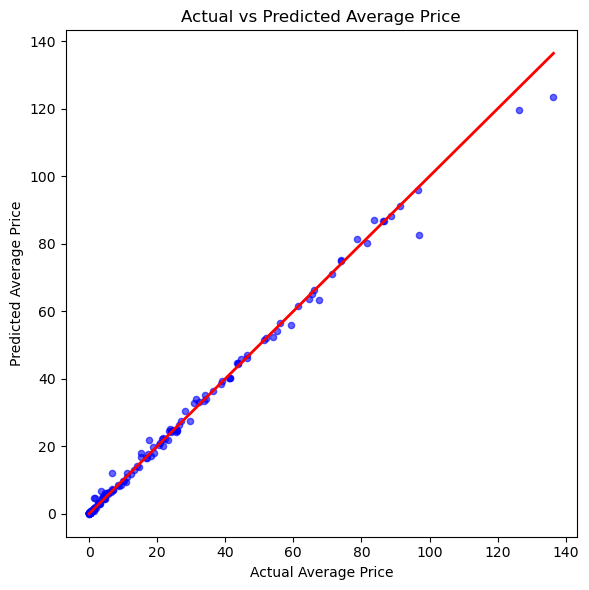

In [3]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

option_data_df = pd.read_csv('option_data.csv')

label_encoder = LabelEncoder()
option_data_df['Type'] = label_encoder.fit_transform(option_data_df['Type'])

option_data_df['Average Price'] = (option_data_df['Bid'] + option_data_df['Ask']) / 2

option_data_df['DataDate'] = pd.to_datetime(option_data_df[' DataDate'])
option_data_df['Expiration'] = pd.to_datetime(option_data_df['Expiration'])
option_data_df['TimeToMaturity'] = (option_data_df['Expiration'] - option_data_df['DataDate']).dt.days / 252

columns_to_drop = ['Expiration', 'DataDate', ' DataDate', 'AKA', 'OptionSymbol', 'Ask', 'Bid']
option_data_df.drop(columns=[col for col in columns_to_drop if col in option_data_df.columns], inplace=True)


train_features = option_data_df.drop('Average Price', axis=1)
train_target = option_data_df['Average Price']

train_features, test_features, train_target, test_target = train_test_split(train_features, train_target, test_size=0.2, random_state=42)


scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

start_train = time.time()
rf_model = RandomForestRegressor(n_estimators=150, max_depth=20, random_state=42)
rf_model.fit(train_features_scaled, train_target)
end_train = time.time()

start_test = time.time()
predictions = rf_model.predict(test_features_scaled)
end_test = time.time()

training_time = end_train - start_train
testing_time = end_test - start_test

rmse = np.sqrt(mean_squared_error(test_target, predictions))
mae = mean_absolute_error(test_target, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

plt.figure(figsize=(6, 6))
plt.scatter(test_target, predictions, color='blue', alpha=0.6, s=20)
max_val = max(max(test_target), max(predictions))
plt.plot([0, max_val], [0, max_val], color='red', linewidth=2)
plt.title('Actual vs Predicted Average Price')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.tight_layout()
plt.savefig("plot5_up.png")
plt.show()
